<a href="https://colab.research.google.com/github/Muskan2320/Regression/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook predicts the credit card default based on the loan, income, age and loan to income (loan/income).

Data source: Github

# Import Library

 The 'Pandas' package is a fast, flexible tool used to analyze data. It helps in reading and updating the files like csv files, excel, etc.

In [ ]:
import pandas as pd

# Import data

Dataset is imported from github in raw form.

In [ ]:
data = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Credit%20Default.csv')
data.head()

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1


# Define dependent and independent variables

In [ ]:
print(data.columns)                                # Returns the name of columns

X = data.drop(['Default'], axis = 1)               # axis = 1 means it drops the column
Y = data['Default']

Index(['Income', 'Age', 'Loan', 'Loan to Income', 'Default'], dtype='object')


# Split training and test data

In [ ]:
from sklearn.model_selection import train_test_split

# Specifying the train size to 0.75 means splitting the data in 75% train data and 25% test data. It can also be done using test_size = 0.25
# Specifying the random_state means specifying the seed as row are assigned to train and test set randomly.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 200)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1400, 4), (600, 4), (1400,), (600,))

# Select Model

We are using logistic regression for prediction.

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring.

In [13]:
from sklearn.linear_model import LogisticRegression

# We specify the number of iterations it requires to create a best classifier possible. If it gives warning then increase the nuber of iterations.
model = LogisticRegression(max_iter = 500)

In [14]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

# Model prediction on test data

In [18]:
y_pred = model.predict(X_test)

# Visualization

<Axes: xlabel='Loan'>

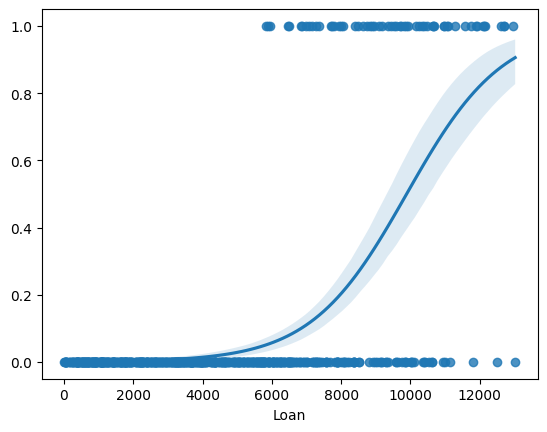

In [21]:
import seaborn as sns

sns.regplot(x = X_test['Loan'], y = y_pred, data = data, logistic = True)

# Model Accuracy

As logistic regression is used for classification purpose hence, the accuracy measures are accuracy score and confusion matrix.

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [23]:
print("Accuracy score:")
accuracy_score(Y_test, y_pred)

Accuracy score:


0.9166666666666666

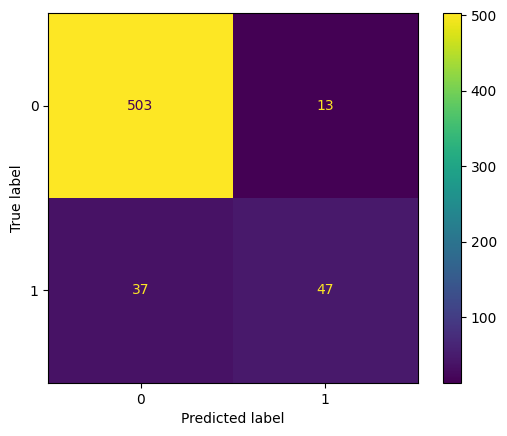

In [25]:
import matplotlib.pyplot as plt

matrix = confusion_matrix(Y_test, y_pred)                              # It creates the confusion matrix
cm =  ConfusionMatrixDisplay(matrix)                                    # It displays the confusion matrix
cm.plot()

In [26]:
# It displays the precision, recall, f1-score.

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       516
           1       0.78      0.56      0.65        84

    accuracy                           0.92       600
   macro avg       0.86      0.77      0.80       600
weighted avg       0.91      0.92      0.91       600

